In [40]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install matplotlib

In [42]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [45]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [46]:
ticker = 'AAPL'
stock_data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
print(stock_data.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.960464  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.251144  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.826859  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.484329  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.650337  132079200


In [47]:
# Data storage
stock_data.to_csv('AAPL_stock_data.csv')

In [48]:
# Data cleaning
stock_data = pd.read_csv('AAPL_stock_data.csv', index_col='Date', parse_dates=True)
stock_data.isnull().sum()  # Check for missing values
stock_data.dropna(inplace=True)  # Drop rows with missing values

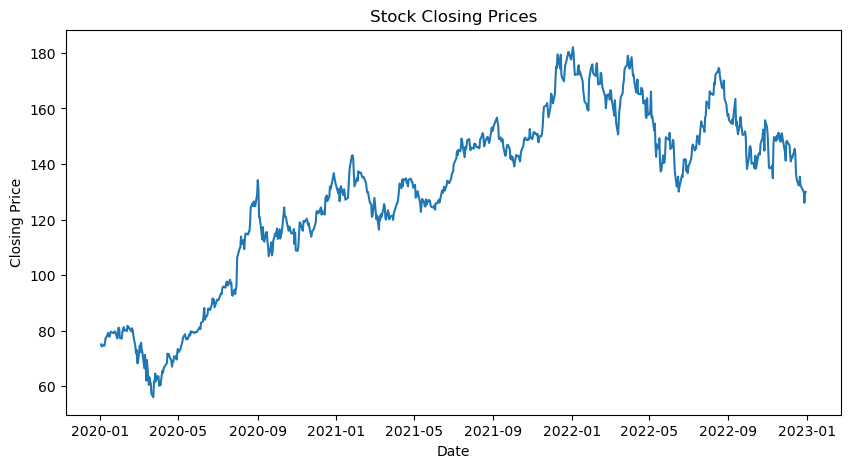

In [49]:
# Data exploration
plt.figure(figsize=(10, 5))
plt.plot(stock_data['Close'])
plt.title('Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [50]:
print(stock_data.describe())

             Open        High         Low       Close   Adj Close  \
count  756.000000  756.000000  756.000000  756.000000  756.000000   
mean   130.231998  131.892775  128.614983  130.311812  128.230002   
std     30.596429   30.841435   30.287325   30.566496   30.563733   
min     57.020000   57.125000   53.152500   56.092499   54.632896   
25%    115.924374  117.275000  114.129997  115.739374  113.236620   
50%    135.794998  137.200005  133.750000  135.379997  133.632828   
75%    150.259998  151.902504  149.029995  150.704998  148.914711   
max    182.630005  182.940002  179.119995  182.009995  179.481110   

             Volume  
count  7.560000e+02  
mean   1.120920e+08  
std    5.602586e+07  
min    3.519590e+07  
25%    7.636470e+07  
50%    9.493580e+07  
75%    1.296327e+08  
max    4.265100e+08  


In [51]:
# Data standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(stock_data[['Close']])

In [52]:
# Feature selection and data partitioning
# Convert dates to numeric format
X = np.arange(len(stock_data)).reshape(-1, 1)  # Using index positions as features
y = stock_data['Close'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# KNN Model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('KNN MSE:', mean_squared_error(y_test, y_pred_knn))

KNN MSE: 5.745478589149081


In [54]:
# Vector Machine (SVM) Models for Stock Quotes
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
print('SVR MSE:', mean_squared_error(y_test, y_pred_svr))

SVR MSE: 6.004651951426762


In [55]:
# Bayesian Model for Stock Quotes
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)
y_pred_bayes = bayesian_ridge.predict(X_test)
print('Bayesian Ridge MSE:', mean_squared_error(y_test, y_pred_bayes))

Bayesian Ridge MSE: 300.6208455614407


In [56]:
# Random Forest Models for Stock Quotes
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest MSE:', mean_squared_error(y_test, y_pred_rf))

Random Forest MSE: 5.4208348025803765


In [57]:
# Model Comparison through Report and ROC
models = {
    'KNN': (y_test, y_pred_knn),
    'SVR': (y_test, y_pred_svr),
    'Bayesian Ridge': (y_test, y_pred_bayes),
    'Random Forest': (y_test, y_pred_rf)
}
for name, (true, pred) in models.items():
    print(f'{name} - MSE: {mean_squared_error(true, pred)}, R2: {r2_score(true, pred)}')

KNN - MSE: 5.745478589149081, R2: 0.9943342542734953
SVR - MSE: 6.004651951426762, R2: 0.9940786775888094
Bayesian Ridge - MSE: 300.6208455614407, R2: 0.7035510193607357
Random Forest - MSE: 5.4208348025803765, R2: 0.9946543928168469


In [58]:
# Analysis of factors affecting stock marketing
# Correlation analysis
correlations = stock_data.corr()
print(correlations)

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999003  0.998742  0.997258   0.997201 -0.565022
High       0.999003  1.000000  0.998609  0.998727   0.998719 -0.553469
Low        0.998742  0.998609  1.000000  0.998780   0.998665 -0.580560
Close      0.997258  0.998727  0.998780  1.000000   0.999914 -0.567390
Adj Close  0.997201  0.998719  0.998665  0.999914   1.000000 -0.568377
Volume    -0.565022 -0.553469 -0.580560 -0.567390  -0.568377  1.000000


In [59]:
# Regression analysis
X_factors = stock_data[['Volume']]  # Example factor
y_prices = stock_data['Close']
lin_reg = LinearRegression()
lin_reg.fit(X_factors, y_prices)
y_pred_reg = lin_reg.predict(X_factors)
print('Regression Coefficients:', lin_reg.coef_)

Regression Coefficients: [-3.09555966e-07]
